In [1]:
#라이브러리 선언
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
#Tensorflow 그레프 세션을 생성합니다.
sess = tf.Session()

In [3]:
#붗꽃의 데이터를 불러옵니다
iris = datasets.load_iris()

#불러오는 붗꽃의 데이터는 Sepal의 길이, 폯과 Petal의 길이, 폯입니다.
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [4]:
#데이터를 학습 데이터와 테스트 데이터로 나누는 작업입니다.
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]

y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [5]:
#일괄 작업 크기를 50으로 생성합니다.
batch_size = 50

#플레이스 홀더를 초기화 해줍니다.
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

#선형 회귀를 위해 변수를 생성합니다.
A = tf.Variable(tf.random_normal(shape = [1, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

In [6]:
#모델을 생성합니다.
model_output = tf.add(tf.matmul(x_data, A), b)

In [7]:
# Declare loss function
# = max(0, abs(target - predicted) + epsilon)

# 1/2 margin width parameter = epsilon
epsilon = tf.constant([0.5])

# Margin term in loss
loss = tf.reduce_mean(tf.maximum(0., tf.subtract(tf.abs(tf.subtract(model_output, y_target)), epsilon)))

In [8]:
#최적화 함수를 선언
my_opt = tf.train.GradientDescentOptimizer(0.075)
train_step = my_opt.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()
sess.run(init)

In [9]:
#학습을 반복시킵니다
train_loss = []
test_loss = []

for i in range(200):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_train_loss = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
    train_loss.append(temp_train_loss)
    
    temp_test_loss = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
    test_loss.append(temp_test_loss)
    
    if (i+1)%50==0:
        print('-----------')
        print('Generation: ' + str(i+1))
        print('A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Train Loss = ' + str(temp_train_loss))
        print('Test Loss = ' + str(temp_test_loss))

-----------
Generation: 50
A = [[2.7870045]] b = [[1.7606168]]
Train Loss = 0.93246895
Test Loss = 0.93935174
-----------
Generation: 100
A = [[2.1903036]] b = [[2.800116]]
Train Loss = 0.5427218
Test Loss = 0.6046751
-----------
Generation: 150
A = [[1.6284043]] b = [[3.7571158]]
Train Loss = 0.21276914
Test Loss = 0.30717131
-----------
Generation: 200
A = [[1.2528042]] b = [[4.316615]]
Train Loss = 0.095705986
Test Loss = 0.15170264


In [10]:
#계수 추출
[[slope]] = sess.run(A)
[[y_intercept]] = sess.run(b)
[width] = sess.run(epsilon)

In [11]:
#최적화 된 선을 얻을 수 있습니다.
best_fit = []
best_fit_upper = []
best_fit_lower = []

for i in x_vals:
    best_fit.append(slope * i + y_intercept)
    best_fit_upper.append(slope * i + y_intercept + width)
    best_fit_lower.append(slope * i + y_intercept - width)

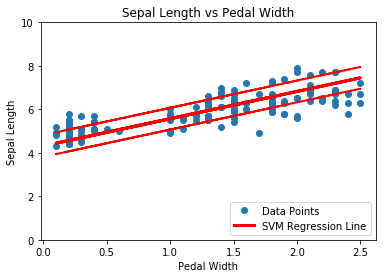

In [12]:
#붗꽃 데이터: 꽃받침 길이와 꽃잎 폭
#붓꽃 데이터에 대한 마진이 0.5인 SVM 회귀 결과
plt.plot(x_vals, y_vals, 'o', label='Data Points')

plt.plot(x_vals, best_fit, 'r-', label='SVM Regression Line', linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=2)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=2)

plt.ylim([0, 10])
plt.legend(loc='lower right')

plt.title('Sepal Length vs Pedal Width')

plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')

plt.show()

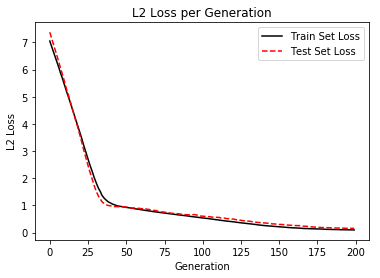

In [13]:
#학습 반복 횟수에 따른 학습 셋과 테스트 셋의 비용 함수 값을 그래프로 표현
plt.plot(train_loss, 'k-', label='Train Set Loss')
plt.plot(test_loss, 'r--', label='Test Set Loss')

plt.title('L2 Loss per Generation')

plt.xlabel('Generation')
plt.ylabel('L2 Loss')

plt.legend(loc='upper right')

plt.show()